In [1]:
# Display Per condition results here for the CARLA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import os

## Dataset Distribution

In [2]:
# Loading all the files measurement.json files
import json
root_dir = '/store/harsh/carla_data_neat/'
train_towns = ["expert"]
train_data = [] 
for town in train_towns:
    train_data.append(os.path.join(root_dir, town))
    
weather_df = pd.DataFrame(columns = ['route', 'number','weather'])
for sub_root in train_data:
    root_files = os.listdir(sub_root)
    routes = [folder for folder in root_files if not os.path.isfile(os.path.join(sub_root,folder))]
    
    for route in routes:
        route_dir = os.path.join(sub_root, route)
        num_seq = len(os.listdir(route_dir+"/rgb_front/"))
        for seq in range(num_seq):
            file_number = seq
            with open(route_dir + f"/measurements/{str(file_number).zfill(4)}.json", "r") as read_file:
                data = json.load(read_file)
            data_dict = {
                'route':route,
                'number':file_number,
                'weather':data['weather']
            }
            weather_df = weather_df.append(data_dict, ignore_index=True)

/tmp/ipykernel_3165121/2267084532.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(data_dict, ignore_index=True)
/tmp/ipykernel_3165121/2267084532.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(data_dict, ignore_index=True)
/tmp/ipykernel_3165121/2267084532.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(data_dict, ignore_index=True)
/tmp/ipykernel_3165121/2267084532.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  weather_df = weather_df.append(data_dict, ignore_index=True)
/tmp/ipykernel_3165121/2267084532.py:26: FutureWarni

Text(0, 0.5, 'Proportion of Samples')

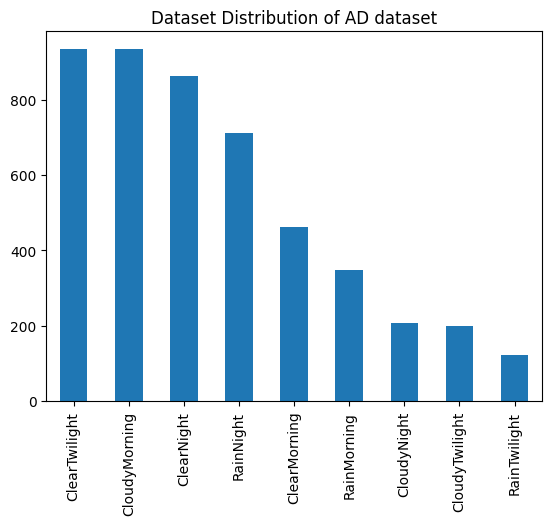

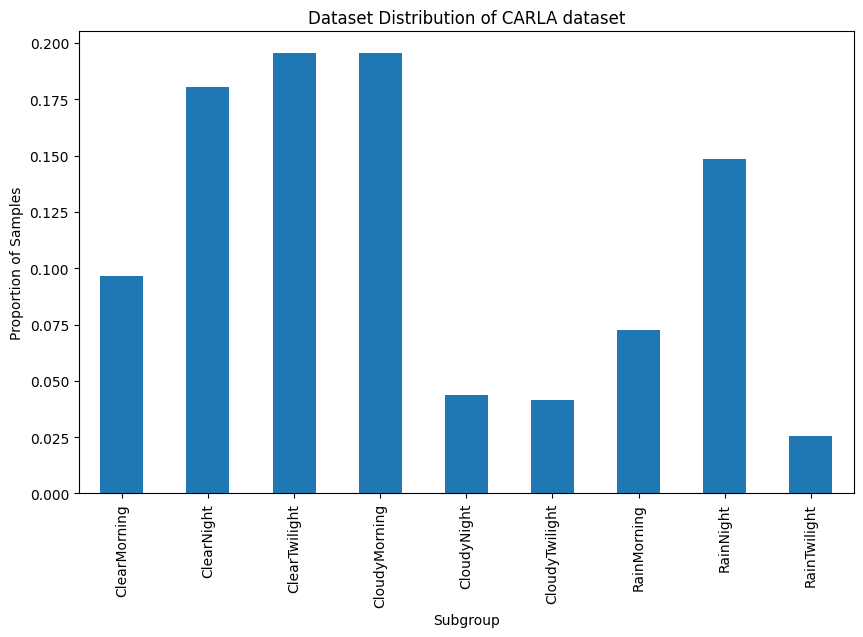

In [8]:
# Bar plot for the weather conditions
# Order ClearTwilight, ClearDay, ClearNight, CloudyTwilight, CloudyDay, CloudyNight, RainTwilight, RainDay, RainNight 
weather_df['weather'].value_counts().plot(kind='bar', title='Dataset Distribution of AD dataset')

df = weather_df.groupby('weather').size()/weather_df.shape[0]
plt.figure(figsize=(10,6))
df.plot(kind='bar', title='Dataset Distribution of CARLA dataset')
plt.xlabel('Subgroup')
plt.ylabel('Proportion of Samples')


In [ ]:
PATH = 'parsed'
files = os.listdir(PATH)

results_df_dict = {}
for file in files:
    if file.endswith('.csv') and 'weather_daytime' in files:
        df = pd.read_csv(os.path.join(PATH, file))
        print(df.columns)

   